# Imports

In [1]:
import os
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [2]:
#initial data set
spam = pd.read_csv("SMSSpamCollection.csv", header=0, names=['spamorham', 'text'])
print(spam.shape)
spam.head(10)

(5571, 2)


,spamorham,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
5,ham,Even my brother is not like to speak with me. ...
6,ham,As per your request 'Melle Melle (Oru Minnamin...
7,spam,WINNER!! As a valued network customer you have...
8,spam,Had your mobile 11 months or more? U R entitle...
9,ham,I'm gonna be home soon and i don't want to tal...


# Data Preprocessing

In [3]:
#creating a target col, with 0 for ham, 1 for spam
df = spam.drop(columns="spamorham")
df["spam"] = spam["spamorham"].apply(lambda x:1 if 'spam' in str(x)
                                  else 0)
df.columns=['text','target']
df.head(10)

,text,target
0,Ok lar... Joking wif u oni...,0
1,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,U dun say so early hor... U c already then say...,0
3,"Nah I don't think he goes to usf, he lives aro...",0
4,FreeMsg Hey there darling it's been 3 week's n...,1
5,Even my brother is not like to speak with me. ...,0
6,As per your request 'Melle Melle (Oru Minnamin...,0
7,WINNER!! As a valued network customer you have...,1
8,Had your mobile 11 months or more? U R entitle...,1
9,I'm gonna be home soon and i don't want to tal...,0


# Exploratory Data Analysis
13.409% are spam

In [4]:
df['target'].mean()*100

13.408723747980615

In [5]:
#creating two seperate dfs: 1 for spam and 1 for non spam messages only
df_s = df.loc[ df['target']==1]
df_ns = df.loc[ df['target']==0]
    
df_s['len'] = [len(x) for x in df_s["text"]]
spamavg = df_s.len.mean()
print('df_s.head(5)')
print(df_s.head(5))

print('\n\ndf_ns.head(5)')
df_ns['len'] = [len(x) for x in df_ns["text"]]
nonspamavg = df_ns.len.mean()
print(df_ns.head(5))

df_s.head(5)
                                                 text  target  len
1   Free entry in 2 a wkly comp to win FA Cup fina...       1  155
4   FreeMsg Hey there darling it's been 3 week's n...       1  148
7   WINNER!! As a valued network customer you have...       1  158
8   Had your mobile 11 months or more? U R entitle...       1  154
10  SIX chances to win CASH! From 100 to 20,000 po...       1  136


df_ns.head(5)
                                                text  target  len
0                      Ok lar... Joking wif u oni...       0   29
2  U dun say so early hor... U c already then say...       0   49
3  Nah I don't think he goes to usf, he lives aro...       0   61
5  Even my brother is not like to speak with me. ...       0   77
6  As per your request 'Melle Melle (Oru Minnamin...       0  160


C:\Users\Dehan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Dehan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
spamavg

139.11914323962517

In [7]:
nonspamavg

71.55078772802653

In [8]:
df['length'] = df['text'].apply(lambda x: len(''.join([a for a in x if a.isdigit()])))

print(np.mean(df['length'][df['target'] == 0]), np.mean(df['length'][df['target'] == 1]))

print(df.head(10))

0.30534825870646765 15.812583668005354
                                                text  target  length
0                      Ok lar... Joking wif u oni...       0       0
1  Free entry in 2 a wkly comp to win FA Cup fina...       1      25
2  U dun say so early hor... U c already then say...       0       0
3  Nah I don't think he goes to usf, he lives aro...       0       0
4  FreeMsg Hey there darling it's been 3 week's n...       1       4
5  Even my brother is not like to speak with me. ...       0       0
6  As per your request 'Melle Melle (Oru Minnamin...       0       1
7  WINNER!! As a valued network customer you have...       1      19
8  Had your mobile 11 months or more? U R entitle...       1      13
9  I'm gonna be home soon and i don't want to tal...       0       0


# Data Modelling
### MNNB Model Fitting 1

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['target'], 
                                                    random_state=0)

In [10]:
#fitting and transforming X_train using a Count Vectorizer with default parameters
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [11]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
X_train_vectorized

<4178x7416 sparse matrix of type '<class 'numpy.int64'>'
	with 55415 stored elements in Compressed Sparse Row format>

In [13]:
#fitting a multinomial Naive Bayes Classifier Model with smoothing alpha=0.1
model = sklearn.naive_bayes.MultinomialNB(alpha=0.1)
model_fit = model.fit(X_train_vectorized, y_train)

In [14]:
#making predictions & looking at AUC score
predictions = model.predict(vect.transform(X_test))
aucscore = roc_auc_score(y_test, predictions) #good!
aucscore

0.9615532083312719

In [15]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(pd.DataFrame(confusion_matrix(y_test, predictions),
             columns=['Predicted Spam', "Predicted Ham"], index=['Actual Spam', 'Actual Ham']))

print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

             Predicted Spam  Predicted Ham
Actual Spam            1185              4
Actual Ham               15            189

True Positives: 189
False Positives: 4
True Negatives: 1185
False Negatives: 15

True Positive Rate: 0.9264705882352942
Specificity: 0.9966358284272497
False Positive Rate: 0.00336417157275021


### MNNB Model Fitting 2

In [16]:
# fitting and transforming X_train using a tfid vectorizer, ignoring terms with a document frequency lower than 3.
vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [17]:
# fitting training data to a multinomial NB model
model = sklearn.naive_bayes.MultinomialNB()
model_fit = model.fit(X_train_vectorized, y_train) 

In [18]:
#looking at model features
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
((pd.Series(feature_names[sorted_tfidf_index[:20]]),
            pd.Series(feature_names[sorted_tfidf_index[-21:-1]])))

(0            lift
 1        storming
 2       grahmbell
 3        telphone
 4         invnted
 5        margaret
 6            4get
 7              wt
 8            phne
 9           moral
 10            7th
 11            5th
 12    personality
 13            6th
 14        wonders
 15            3rd
 16          36504
 17        showing
 18     100percent
 19        genuine
 dtype: object,
 0       those
 1        nite
 2     anytime
 3       right
 4     towards
 5       space
 6        okie
 7          or
 8         too
 9        type
 10         ok
 11      staff
 12        out
 13     alrite
 14     unsold
 15        say
 16        sad
 17       none
 18         he
 19      thanx
 dtype: object)

In [19]:
#making predictions
predictions = model_fit.predict(vect.transform(X_test))
aucscore = roc_auc_score(y_test, predictions)
print(aucscore)

0.9166666666666667


In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(pd.DataFrame(confusion_matrix(y_test, predictions),
             columns=['Predicted Spam', "Predicted Ham"], index=['Actual Spam', 'Actual Ham']))
print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'True Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

             Predicted Spam  Predicted Ham
Actual Spam            1189              0
Actual Ham               34            170

True Positives: 170
False Positives: 0
True Negatives: 1189
False Negatives: 34
True Positive Rate: 0.8333333333333334
Specificity: 1.0
False Positive Rate: 0.0


### SVC Model

In [21]:
#defining an additional function
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [22]:
#fit and transfor x_train and X_test
vectorizer = TfidfVectorizer(min_df=5)

X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed_with_length = add_feature(X_train_transformed, X_train.str.len())

X_test_transformed = vectorizer.transform(X_test)
X_test_transformed_with_length = add_feature(X_test_transformed, X_test.str.len())
        


In [23]:
# SVM creation
clf = SVC(C=10000)

clf.fit(X_train_transformed_with_length, y_train)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_predicted = clf.predict(X_test_transformed_with_length)

In [25]:
roc_auc_score(y_test, y_predicted)

0.97422863173865

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print(pd.DataFrame(confusion_matrix(y_test, y_predicted),
             columns=['Predicted Spam', "Predicted Ham"], index=['Actual Spam', 'Actual Ham']))
print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


print(f'True Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

             Predicted Spam  Predicted Ham
Actual Spam            1186              3
Actual Ham               10            194

True Positives: 194
False Positives: 3
True Negatives: 1186
False Negatives: 10
True Positive Rate: 0.9509803921568627
Specificity: 0.9974768713204374
False Positive Rate: 0.002523128679562658


### Logistic Regression Model with ngrams

In [27]:
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])

X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_train.str.len(),
                                                                    X_train.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_test)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_test.str.len(),
                                                                  X_test.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

clf = LogisticRegression(C=100)

clf.fit(X_train_transformed_with_length, y_train)

y_predicted = clf.predict(X_test_transformed_with_length)

roc_auc_score(y_test, y_predicted)

C:\Users\Dehan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.976679612130807

In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print(pd.DataFrame(confusion_matrix(y_test, y_predicted),
             columns=['Predicted Spam', "Predicted Ham"], index=['Actual Spam', 'Actual Ham']))
print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

             Predicted Spam  Predicted Ham
Actual Spam            1186              3
Actual Ham                9            195

True Positives: 195
False Positives: 3
True Negatives: 1186
False Negatives: 9

True Positive Rate: 0.9558823529411765
Specificity: 0.9974768713204374
False Positive Rate: 0.002523128679562658


# Model Comparison
adapted from https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4
and https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

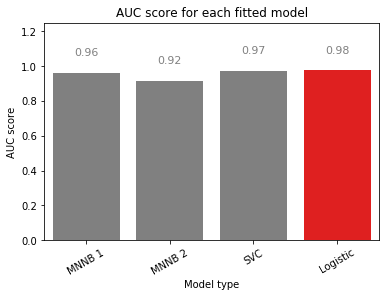

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt

label = ['MNNB 1', 'MNNB 2', 'SVC', 'Logistic']
auclist = [0.9615532083312719, 0.9166666666666667, 0.97422863173865, 0.976679612130807]

#generates an array of length label and use it on the X-axis
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    clrs = ['grey' if (x < max(auclist)) else 'red' for x in auclist ]
    g=sb.barplot(x=index, y=auclist, palette=clrs) # color=clrs)   
    plt.xlabel('Model type', fontsize=10)
    plt.ylabel('AUC score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('AUC score for each fitted model')
    ax=g
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
    g.set_ylim(0,1.25) #To make space for the annotations

plot_bar_x()